In [ ]:
import numpy as np
import pandas as pd

Dataset Source: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3106,ham,Hi. Happy New Year. I dont mean to intrude but...,NaN,NaN,NaN
4220,ham,Plz note: if anyone calling from a mobile Co. ...,NaN,NaN,NaN
3506,ham,Two fundamentals of cool life: \Walk,"like you are the KING\""...! OR \""Walk like yo...","whoever is the KING\""!... Gud nyt""",NaN
3393,ham,Bull. Your plan was to go floating off to IKEA...,NaN,NaN,NaN
4073,ham,A lot of this sickness thing going round. Take...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

# **<h1>Step 1: Data Cleaning</h1>**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We can see here that the last 3 columns are unnamed and serves no purpose. So we need to remove these three columns from our dataset.

In [ ]:
# dropping the last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
2926,ham,Ok... U enjoy ur shows...
2445,ham,The guy (kadeem) hasn't been selling since the...
1460,ham,Yalru lyfu astne chikku.. Bt innu mundhe lyf a...
4018,spam,U've been selected to stay in 1 of 250 top Bri...
2440,ham,"Great. I'm in church now, will holla when i ge..."


In [ ]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
947,ham,Hey i booked the kb on sat already... what oth...
1719,ham,Then u better go sleep.. Dun disturb u liao.. ...
1022,ham,We still on for tonight?
3719,ham,"Yeah why not, is the gang all ready"
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...


We need to encode the target categories Ham and Spam using LabelEncoder() so that Ham = 0 and Spam = 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


###Checking for null values

In [ ]:
df.isnull().sum()
#in this dataset, no duplicate values exist

target    0
text      0
dtype: int64

###Checking for duplicate values

In [ ]:
df.duplicated().sum()

403

In this dataset, in total 403 duplicate values exist and we need to remove them

In [ ]:
df = df.drop_duplicates(keep='first')
#keeping only the first instance of a value

In [ ]:
df.duplicated().sum()

0

#**Step 2: Exploratory Data Analysis (EDA)**

---

 Exploratory Data Analysis is an approach to analyzing datasets to summarize their main characteristics, often with the help of statistical graphics and other data visualization methods. EDA is an essential step in the machine learning workflow as it helps data scientists and analysts understand the structure, patterns, and relationships within the data, which can inform subsequent steps in the modeling process.


In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


###Analysis 1:
Check for imbalanced data

In [ ]:
df['target'].value_counts()
#individual count of each category ham and spam

0    4516
1     653
Name: target, dtype: int64

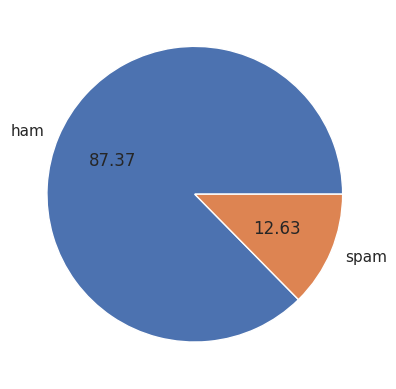

In [ ]:
#visualizing the percentages using pi chart

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

From this analysis, we can see that, in our dataset, the ham percentage is way more than the spam percentage. Thus data is imbalanced.

###Analysis 2:

*   How many characters in the Message?
*   How many words in the Message?
*   How many sentences in the Message?








In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Fetching no of characters in each mail
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#Fetching no of words in each mail
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#Fetching no of sentences in each mail
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Statistics on all the numerical counts

In [ ]:
#all
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Statistics on "ham" mails

In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


Statistics on "spam" mails

In [ ]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


###Histograms for the statistics

In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

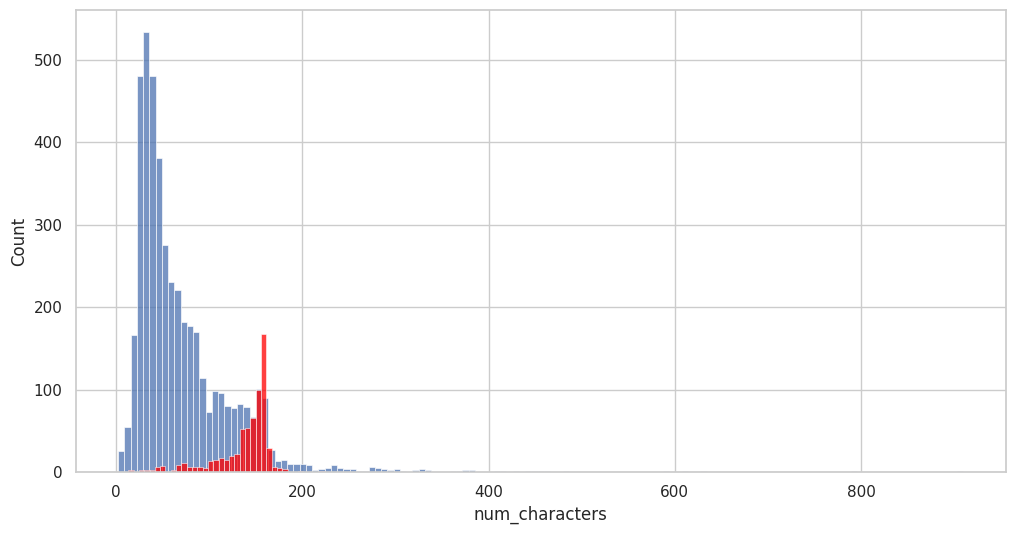

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

Blue portion indicates ham and red portion indicates spam
On an average, spam mails contain more characters in each mail than spam mails.Spam mails are mostly noticeably shorter.

<Axes: xlabel='num_words', ylabel='Count'>

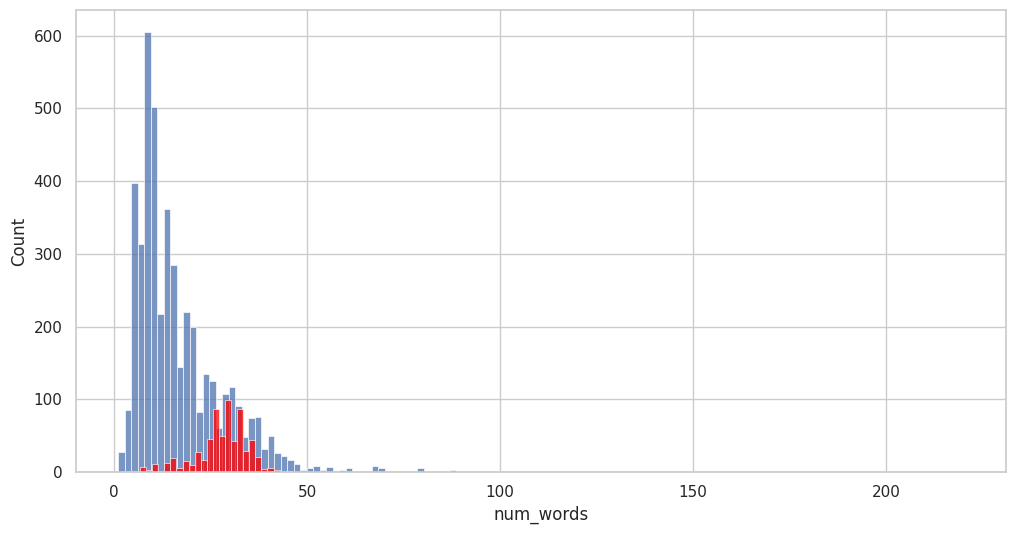

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

We can see that ham mails contain significantly more words than spam mails.

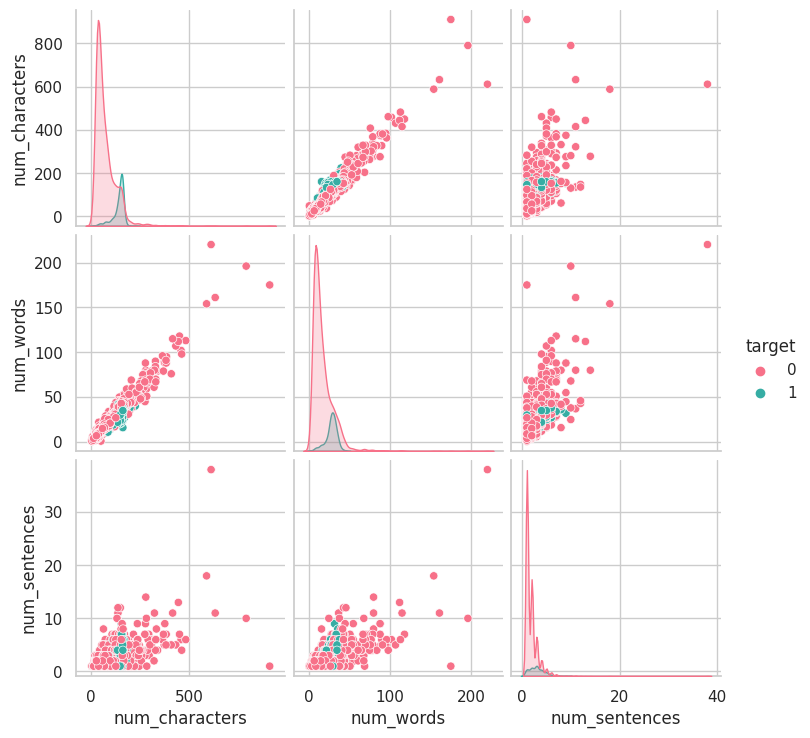

In [ ]:
#relationship of no of sentences with no of words
sns.pairplot(df, hue='target', palette='husl')

We can see that, our dataset contains outliers

###Heatmap

<ipython-input-236-b34fc124eea7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=custom_palette)


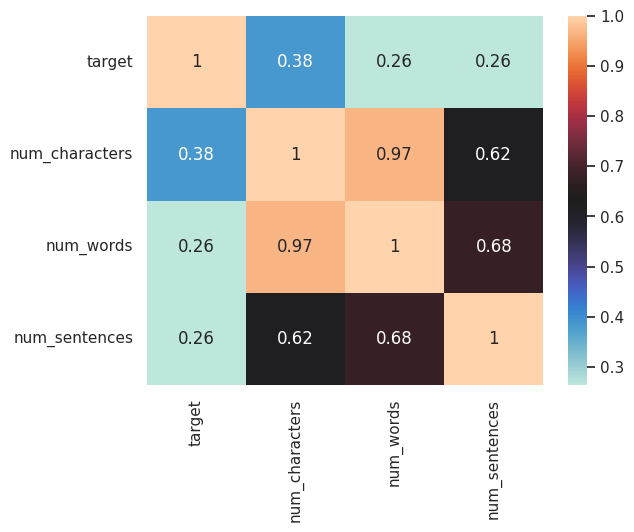

In [ ]:
custom_palette = sns.color_palette("icefire", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=custom_palette)
plt.show()


#**Step 3: Data Preprocessing**
Steps for preprocessing:
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In machine learning, stopwords refer to common words that are often removed from text data during the preprocessing stage. These words are generally considered to be of little value in terms of conveying meaningful information about the content of the text. Common examples of stopwords in natural language processing (NLP) include words like "the," "and," "is," "in," etc.

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

Here, we can see how stop words have been removed and all the words are in lowercase. This is the transformation that we needed.

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


All the mails have been transformed (for both Ham and Spam)

###Highlighting important words using WordCloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
#important words to detect spam mails
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

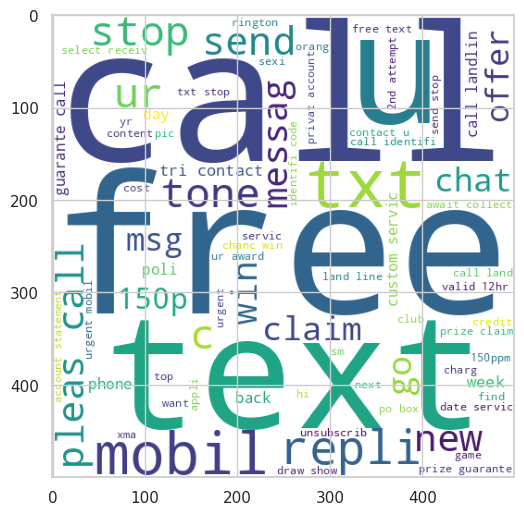

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
#important words to detect ham mails
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

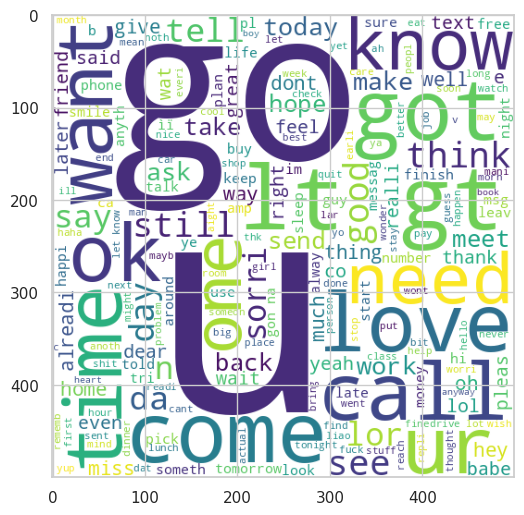

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from collections import Counter

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus) #total word count in spam

9939

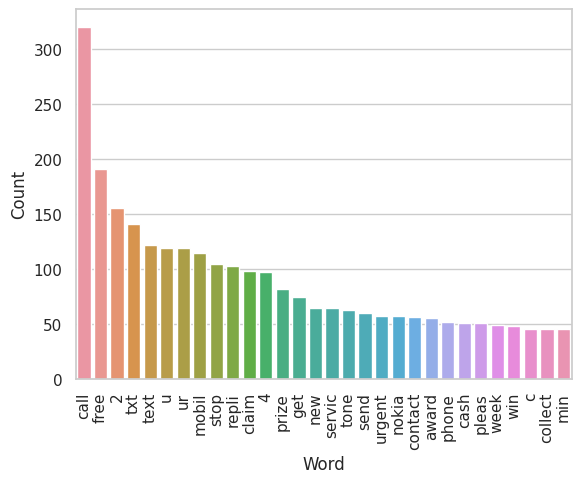

In [ ]:
word_counts = Counter(spam_corpus)
df_word_counts = pd.DataFrame(word_counts.most_common(30), columns=["Word", "Count"])

# Using Seaborn for plotting
sns.barplot(x="Word", y="Count", data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

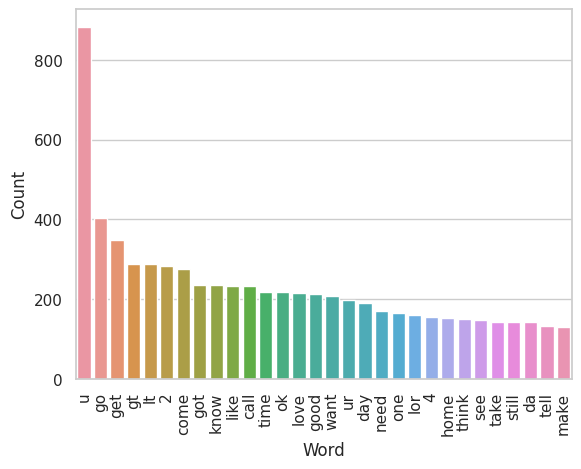

In [ ]:
word_counts = Counter(ham_corpus)
df_word_counts = pd.DataFrame(word_counts.most_common(30), columns=["Word", "Count"])

# Using Seaborn for plotting
sns.barplot(x="Word", y="Count", data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#**Step 4: Model Training and Testing**


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
#converting the sparse array to a dense array
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape #(sms, words)

(5169, 3000)

In [ ]:
y = df['target'].values

##Applying Train-Test Split

80% for Training

20% for Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#20% test, 80% train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

##Applying Naive Bayes Classifier

In email spam detection, we want to reduce the percentages of True positive, so we are applying the Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
mnb = MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

mnb.fit(X_train, y_train)

mnb_pred_train = mnb.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, mnb_pred_train))
print("Training Precision:", precision_score(y_train, mnb_pred_train))

mnb_pred_test = mnb.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, mnb_pred_test))
print("Test Precision:", precision_score(y_test, mnb_pred_test))

Training Accuracy: 0.9789600967351875
Training Precision: 0.9953703703703703
Test Accuracy: 0.9709864603481625
Test Precision: 1.0


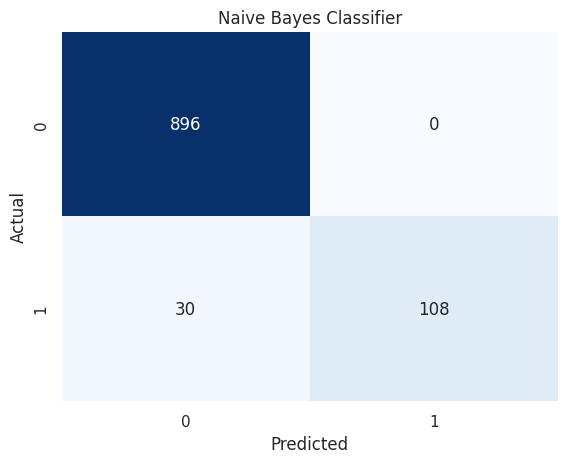

In [ ]:
cm = confusion_matrix(y_test, mnb_pred_test) #for test dataset only

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Classifier')

plt.show()

In the confusion matrix,


* The model correctly predicted 108 instances as positive (True Positives).
* It correctly predicted 896 instances as negative (True Negatives).
* There were no False Positives (instances predicted as positive but actually negative).
* There were 30 False Negatives (instances predicted as negative but actually positive).


##Applying SVM(Support Vector Machine) Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

svc.fit(X_train, y_train)

svc_pred_train = svc.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, svc_pred_train))
print("Training Precision:", precision_score(y_train, svc_pred_train))

svc_pred_test = svc.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, svc_pred_test))
print("Test Precision:", precision_score(y_test, svc_pred_test))

Training Accuracy: 0.985006045949214
Training Precision: 0.9808917197452229
Test Accuracy: 0.9758220502901354
Test Precision: 0.9747899159663865


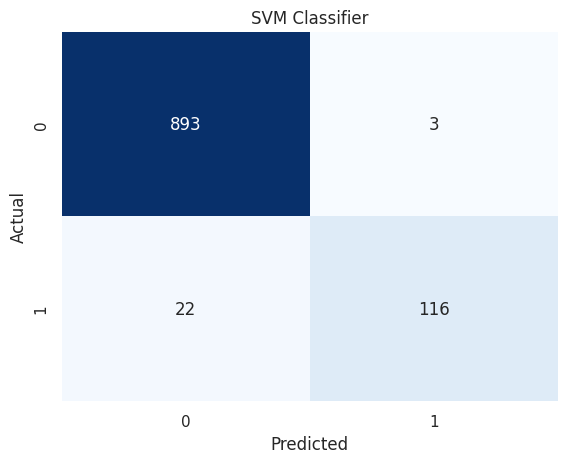

In [ ]:
cm = confusion_matrix(y_test, svc_pred_test) #for test dataset only

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Classifier')

plt.show()

In the confusion matrix,


* The model correctly predicted 116 instances as positive (True Positives).
* It correctly predicted 893 instances as negative (True Negatives).
* There were 3 False Positives (instances predicted as positive but actually negative).
* There were 22 False Negatives (instances predicted as negative but actually positive).

##Applying Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

dtc.fit(X_train, y_train)

dtc_pred_train = dtc.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, dtc_pred_train))
print("Training Precision:", precision_score(y_train, dtc_pred_train))

dtc_pred_test = dtc.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, dtc_pred_test))
print("Test Precision:", precision_score(y_test, dtc_pred_test))

Training Accuracy: 0.9492140266021766
Training Precision: 0.9066666666666666
Test Accuracy: 0.9303675048355899
Test Precision: 0.8173076923076923


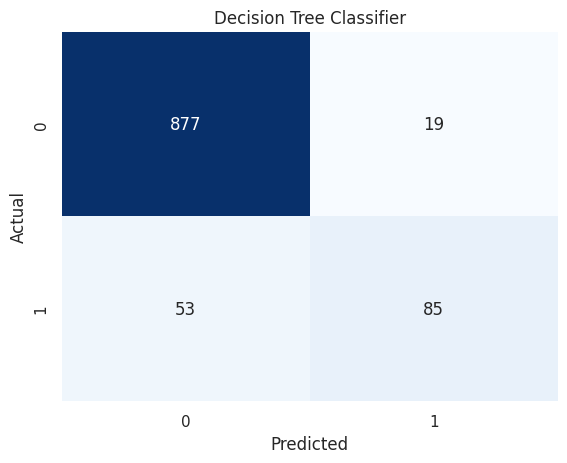

In [ ]:
cm = confusion_matrix(y_test, dtc_pred_test) #for test dataset only

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Classifier')

plt.show()

In the confusion matrix,


* The model correctly predicted 82 instances as positive (True Positives).
* It correctly predicted 887 instances as negative (True Negatives).
* There were 19 False Positives (instances predicted as positive but actually negative).
* There were 56 False Negatives (instances predicted as negative but actually positive).


##Applying KNN(K-Nearest Neighbor) Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

knc.fit(X_train, y_train)

knc_pred_train = knc.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, knc_pred_train))
print("Training Precision:", precision_score(y_train, knc_pred_train))

knc_pred_test = knc.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, knc_pred_test))
print("Test Precision:", precision_score(y_test, knc_pred_test))

Training Accuracy: 0.9257557436517533
Training Precision: 1.0
Test Accuracy: 0.9052224371373307
Test Precision: 1.0


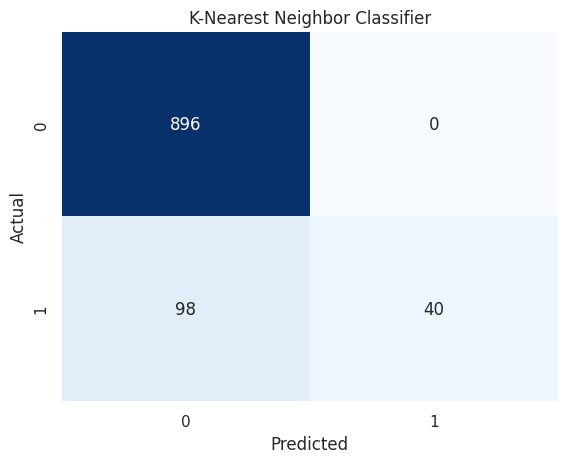

In [ ]:
cm = confusion_matrix(y_test, knc_pred_test) #for test dataset only

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbor Classifier')

plt.show()

In the confusion matrix,


*   The model correctly predicted 40 instances as positive (True
Positives).

*   It correctly predicted 896 instances as negative (True Negatives).

*   There were 0 False Positives (instances predicted as positive but actually negative).
*   There were 98 False Negatives (instances predicted as negative but actually positive).




##Applying RandomForest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

rfc.fit(X_train, y_train)

rfc_pred_train = rfc.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, rfc_pred_train))
print("Training Precision:", precision_score(y_train, rfc_pred_train))

rfc_pred_test = rfc.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, rfc_pred_test))
print("Test Precision:", precision_score(y_test, rfc_pred_test))

Training Accuracy: 0.999758162031439
Training Precision: 1.0
Test Accuracy: 0.9758220502901354
Test Precision: 0.9829059829059829


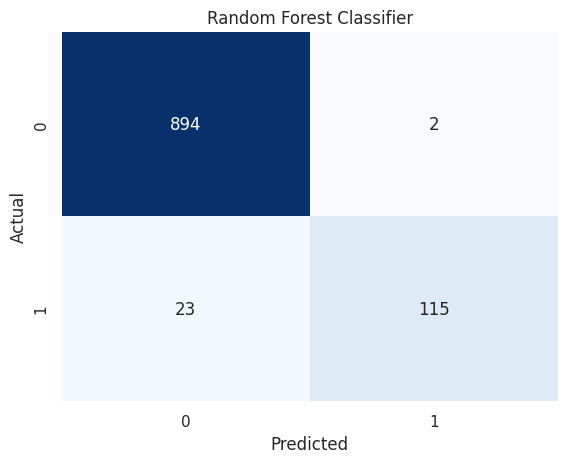

In [ ]:
cm = confusion_matrix(y_test, rfc_pred_test) #for test dataset only

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier')

plt.show()

In the confusion matrix,

*   The model correctly predicted 115 instances as positive (True Positives).
*   It correctly predicted 894 instances as negative (True Negatives).

*   There were 2 False Positives (instances predicted as positive but actually negative).
*   There were 23 False Negatives (instances predicted as negative but actually positive).












##Applying Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

gbdt.fit(X_train, y_train)

gbdt_pred_train = gbdt.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, gbdt_pred_train))
print("Training Precision:", precision_score(y_train, gbdt_pred_train))

gbdt_pred_test = gbdt.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, gbdt_pred_test))
print("Test Precision:", precision_score(y_test, gbdt_pred_test))

Training Accuracy: 0.9671100362756953
Training Precision: 0.9922077922077922
Test Accuracy: 0.9468085106382979
Test Precision: 0.9191919191919192


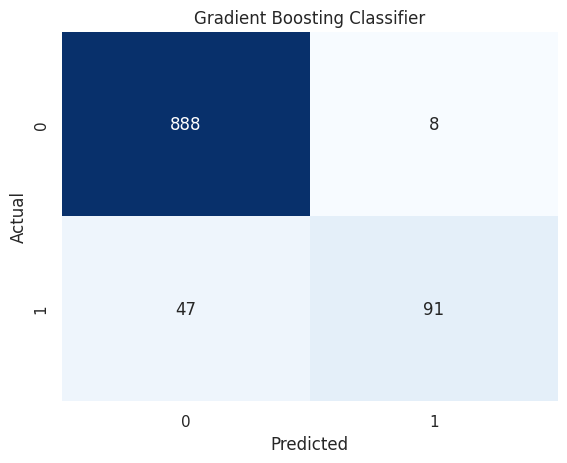

In [ ]:
cm = confusion_matrix(y_test, gbdt_pred_test) #for test dataset only

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Classifier')

plt.show()

In the confusion matrix,

*   The model correctly predicted 91 instances as positive (True Positives).
*   It correctly predicted 888 instances as negative (True Negatives).

*   There were 8 False Positives (instances predicted as positive but actually negative).
*   There were 47 False Negatives (instances predicted as negative but actually positive).










#**Step 5: Comparison Analysis**

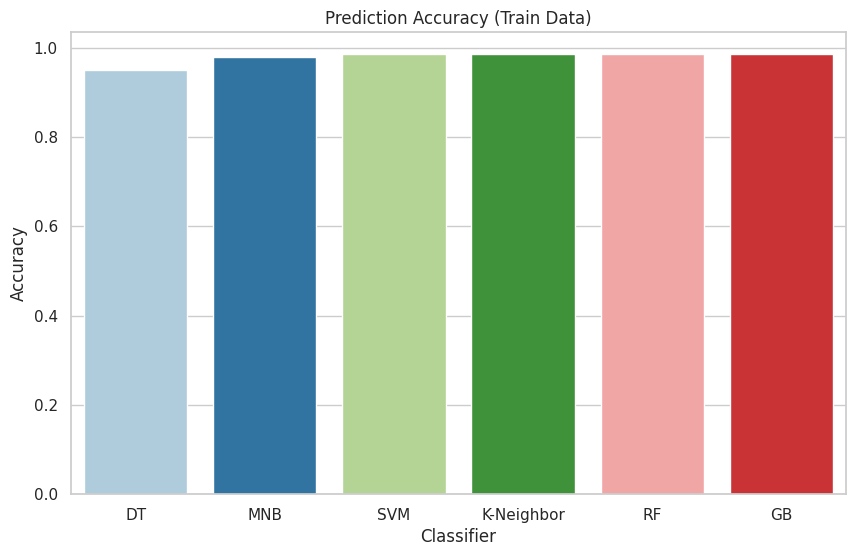

In [ ]:
#for training data
dtc_accuracy = accuracy_score(y_train, dtc_pred_train)
mnb_accuracy = accuracy_score(y_train, mnb_pred_train)
svc_accuracy = accuracy_score(y_train, svc_pred_train)
knc_accuracy = accuracy_score(y_train, svc_pred_train)
rfc_accuracy = accuracy_score(y_train, svc_pred_train)
gbdt_accuracy = accuracy_score(y_train, svc_pred_train)

import pandas as pd
data = pd.DataFrame({'Classifier': ['DT', 'MNB', 'SVM','K-Neighbor','RF','GB'],
                     'Accuracy': [dtc_accuracy, mnb_accuracy, svc_accuracy,knc_accuracy,rfc_accuracy,gbdt_accuracy]})

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x='Classifier', y='Accuracy', data=data, palette="Paired")
plt.title("Prediction Accuracy (Train Data)")
plt.show()


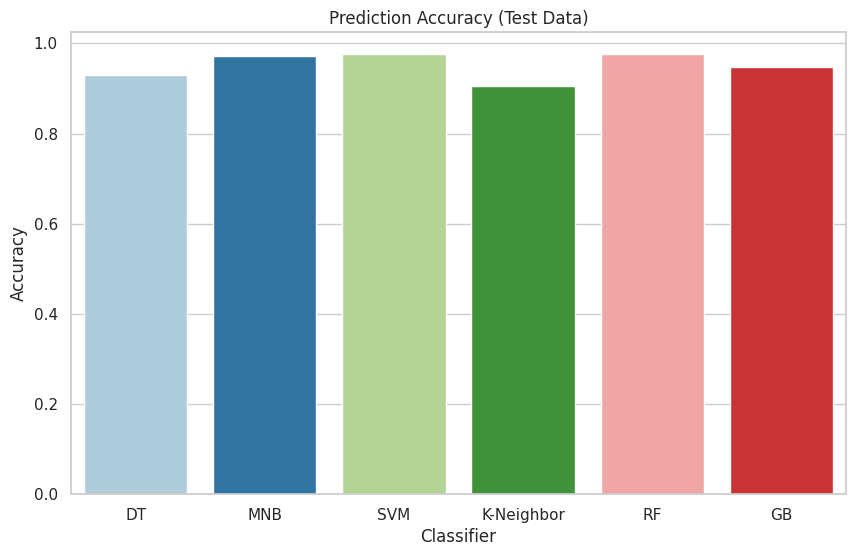

In [ ]:
#for test data
dtc_accuracy_test = accuracy_score(y_test, dtc_pred_test)
mnb_accuracy_test = accuracy_score(y_test, mnb_pred_test)
svc_accuracy_test = accuracy_score(y_test, svc_pred_test)
knc_accuracy_test = accuracy_score(y_test, knc_pred_test)
rfc_accuracy_test = accuracy_score(y_test, rfc_pred_test)
gbdt_accuracy_test = accuracy_score(y_test, gbdt_pred_test)

data_test = pd.DataFrame({'Classifier': ['DT', 'MNB', 'SVM', 'K-Neighbor', 'RF', 'GB'],
                          'Accuracy': [dtc_accuracy_test, mnb_accuracy_test, svc_accuracy_test,
                                       knc_accuracy_test, rfc_accuracy_test, gbdt_accuracy_test]})
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x='Classifier', y='Accuracy', data=data_test, palette="Paired")
plt.title("Prediction Accuracy (Test Data)")
plt.show()


##Precision & Recall Score Analysis

In [ ]:
import sklearn.metrics as mt

In [ ]:
model_train_data = [mnb_pred_train,svc_pred_train,dtc_pred_train,knc_pred_train,rfc_pred_train,gbdt_pred_train]
model_test_data = [mnb_pred_test,svc_pred_test,dtc_pred_test,knc_pred_test,rfc_pred_test,gbdt_pred_test]

In [ ]:
#Train
model_train_precision_scores = []
model_train_recall_scores = []

for model_data in model_train_data:
    model_train_precision_scores.append(mt.precision_score(model_data,y_train))
    model_train_recall_scores.append(mt.recall_score(model_data,y_train))

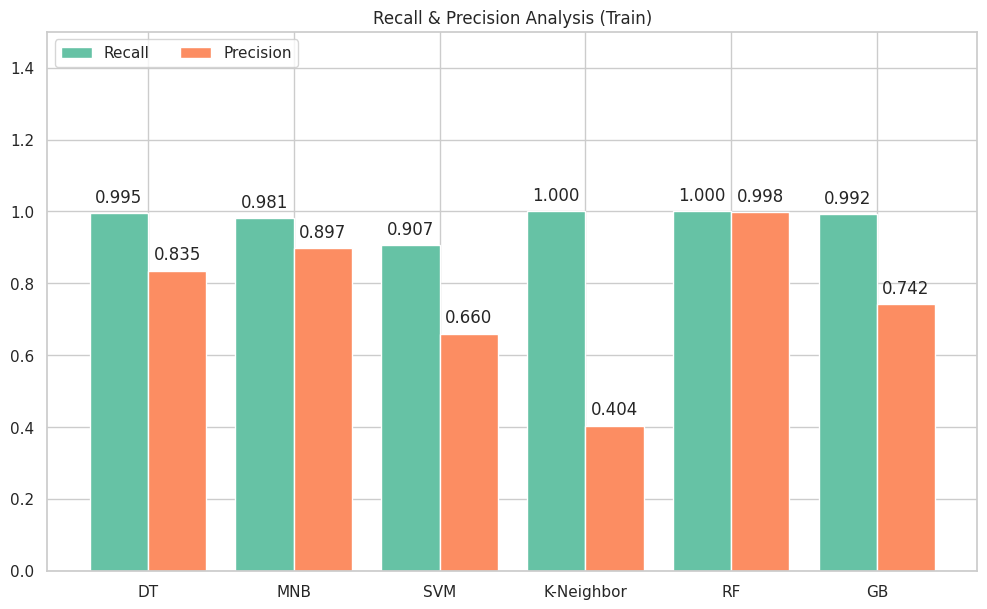

In [ ]:
labels = ['DT', 'MNB', 'SVM', 'K-Neighbor', 'RF', 'GB']
data = {
    'Recall': model_train_recall_scores,
    'Precision': model_train_precision_scores,
}

x = np.arange(len(labels))
width = 0.4
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 7))

color_palette = sns.color_palette("Set2")

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color_palette[multiplier])
    ax.bar_label(rects, fmt='%.3f', label_type="edge", padding=5)
    multiplier += 1

ax.set_title('Recall & Precision Analysis (Train)')
ax.set_xticks(x + width * (multiplier - 1) / 2)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', ncols=6)
ax.set_ylim(0, 1.5)

plt.show()

In [ ]:
#Test
model_test_precision_scores = []
model_test_recall_scores = []

for model_data in model_test_data:
    model_test_precision_scores.append(mt.precision_score(model_data,y_test))
    model_test_recall_scores.append(mt.recall_score(model_data,y_test))

In [ ]:
data = {
    'Recall': model_test_recall_scores,
    'Precision': model_test_precision_scores,
}
#print(data)

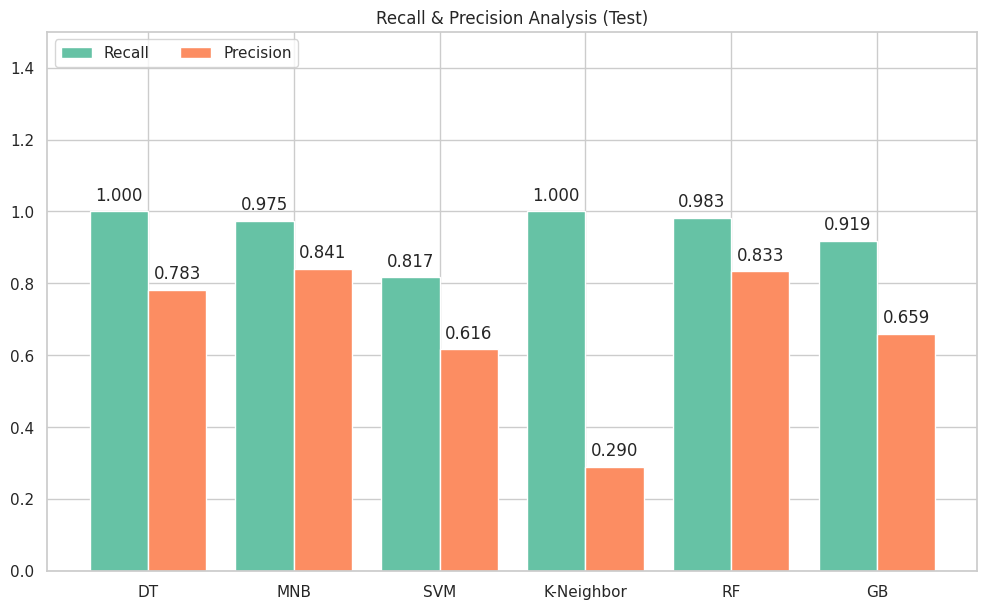

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['DT', 'MNB', 'SVM', 'K-Neighbor', 'RF', 'GB']
data = {
    'Recall': model_test_recall_scores,
    'Precision': model_test_precision_scores,
}

x = np.arange(len(labels))
width = 0.4
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 7))

color_palette = sns.color_palette("Set2")

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color_palette[multiplier])
    ax.bar_label(rects, fmt='%.3f', label_type="edge", padding=5)
    multiplier += 1

ax.set_title('Recall & Precision Analysis (Test)')
ax.set_xticks(x + width * (multiplier - 1) / 2)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.5)

plt.show()


#**Step 6: Final Verdict**


Naive Bayes Classifier:

* Recall: 0.97
* Precision: 0.84

Support Vector Machine (SVM) Classifier:

* Recall: 0.81
* Precision: 0.59

Decision Tree Classifier:

* Recall: 1.0
* Precision: 0.78

Random Forest Classifier:

* Recall: 0.98
* Precision: 0.83

K-Nearest Neighbors (KNN):

* Recall: 1.0
* Precision: 0.28

Gradient Boosting Classifier:

* Recall: 0.91
* Precision: 0.65

In the context of an email spam detection model, the consequences of false positives and false negatives have different implications:

False Positives (Type I errors): These occur when a non-spam (legitimate) email is incorrectly classified as spam. The consequence is that a legitimate email may end up in the spam folder, and the user might miss important information. While this can be inconvenient, it is usually less severe than missing an actual spam email.

False Negatives (Type II errors): These occur when a spam email is incorrectly classified as non-spam. The consequence is that a spam email may reach the user's inbox, potentially causing annoyance or exposing the user to phishing or malicious content.

In the context of email spam detection, it's often preferable to minimize false negatives, as missing a spam email could lead to more significant issues (e.g., security risks, phishing attempts) than marking a legitimate email as spam.

Considering this, we are prioritizing the models that have higher recall (lower false negatives) while maintaining a reasonable level of precision.

Thus our choice is: Naive Bayes Classifier
